In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from scipy.stats import norm
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [2]:
df = pd.read_csv("Store_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.shape

(200, 5)

In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Visualização

In [8]:
plt.style.use('fivethirtyeight')

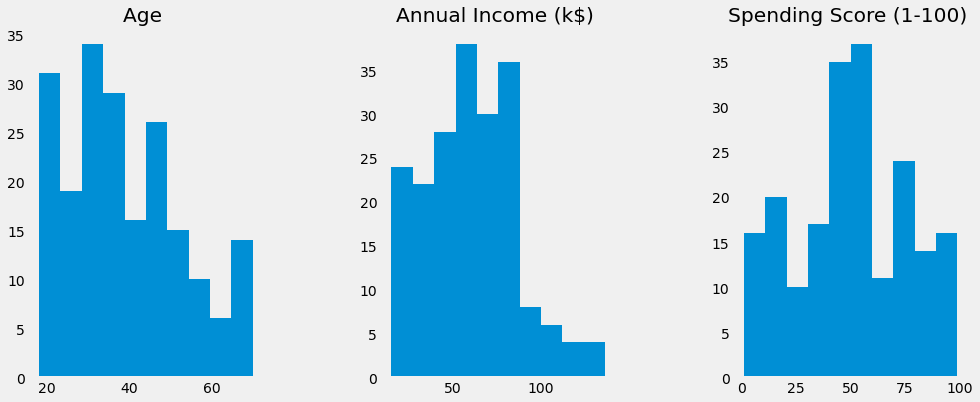

In [9]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3, n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    #sns.distplot(df[x] , bins = (df[x].min(), df[x].max()))
    plt.hist(df[x], bins=10)
    plt.title('{} '.format(x))    
    plt.grid(False)
plt.show()

In [10]:
renda= df.groupby('Annual Income (k$)')
renda.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


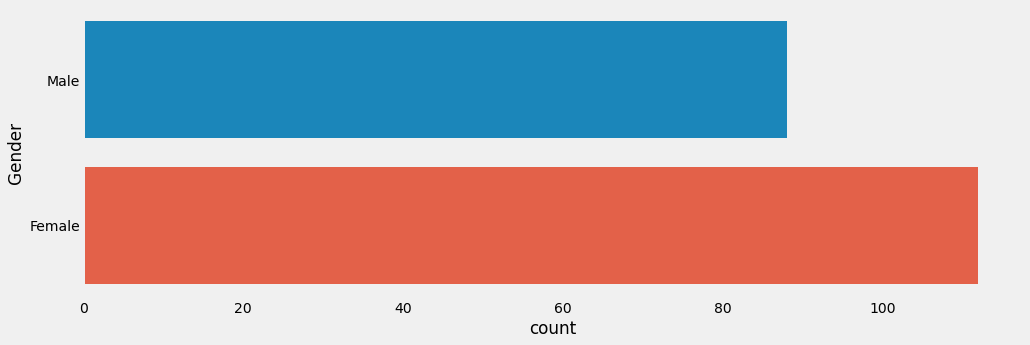

In [11]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)    
plt.grid(False)
plt.show()

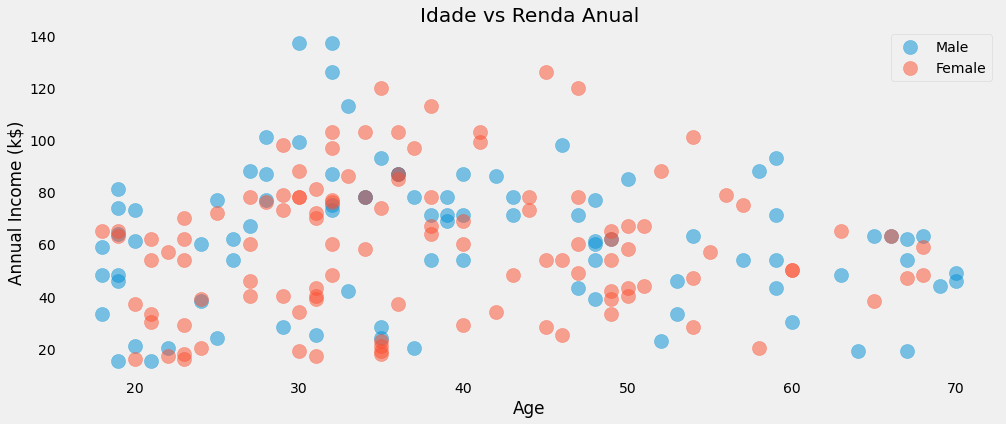

In [12]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Idade vs Renda Anual')
plt.legend()
plt.grid(False)
plt.show()

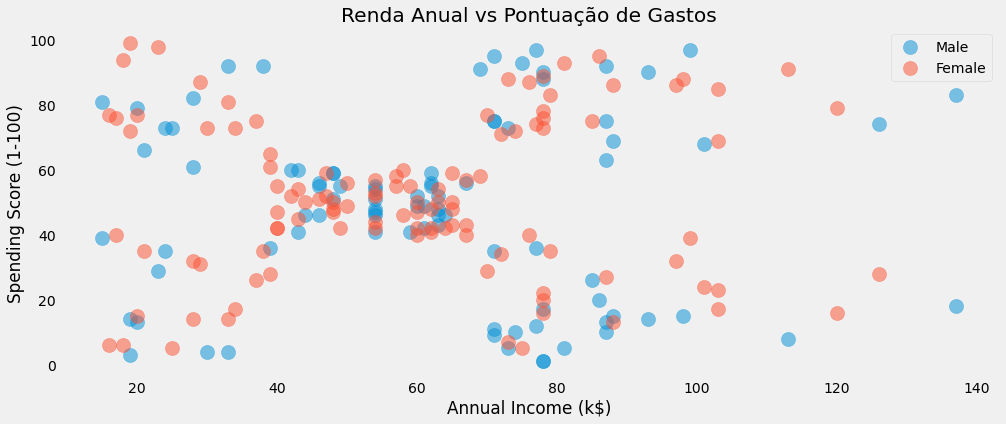

In [13]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Renda Anual vs Pontuação de Gastos')
plt.legend()
plt.grid(False)
plt.show()

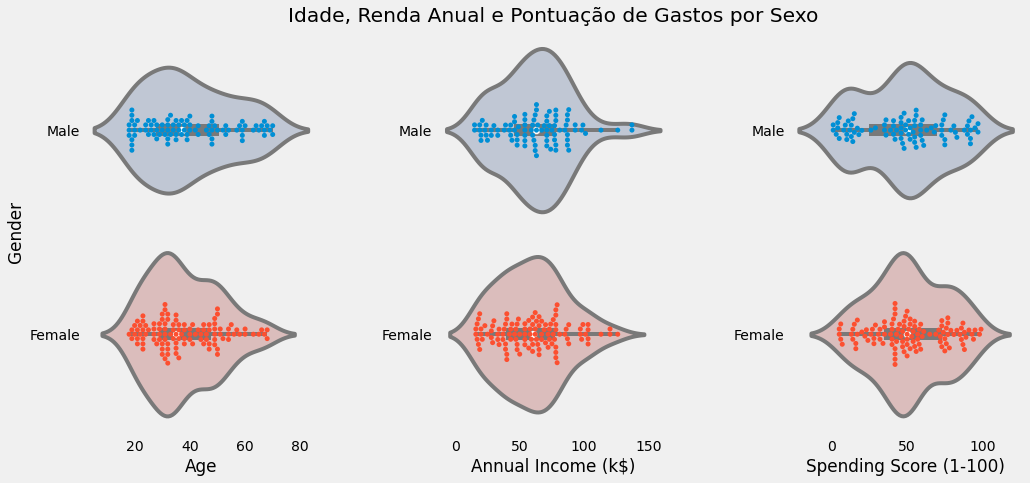

In [14]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Idade, Renda Anual e Pontuação de Gastos por Sexo' if n == 2 else '')
    plt.grid(False)
plt.show()

### Agrupamento de dados utilizando o K-Means (Método Elbow)

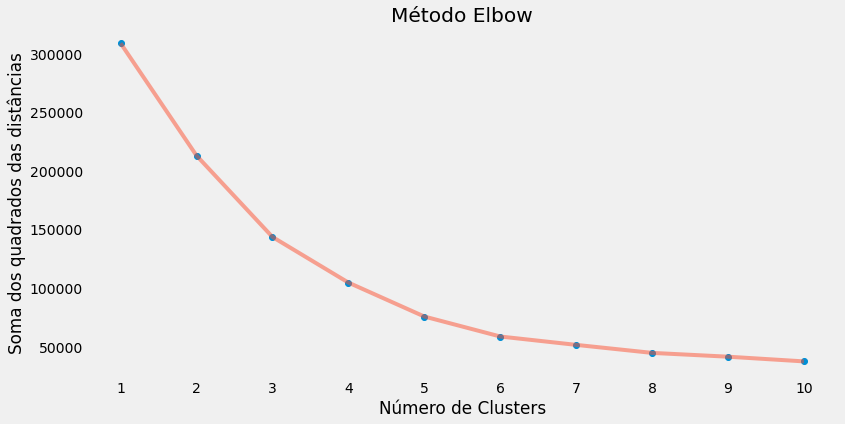

In [15]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,2:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(np.arange(1 , 11) , wcss , 'o')
plt.plot(np.arange(1 , 11) , wcss , '-' , alpha = 0.5)
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.xticks(np.arange(1,11,1))
plt.ylabel("Soma dos quadrados das distâncias")
plt.show()

In [16]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(df.iloc[:,3:])
df["label"] = clusters

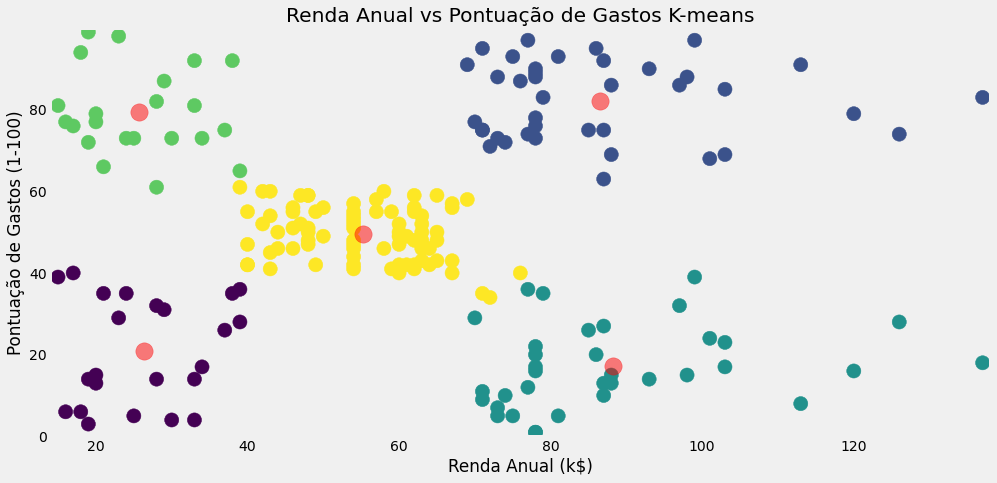

In [17]:
labels2 = km.labels_
centroids2 = km.cluster_centers_

h = 0.02
x_min, x_max = df.iloc[:, 3].min() - 1, df.iloc[:, 3].max() + 1
y_min, y_max = df.iloc[:, 4].min() - 1, df.iloc[:, 4].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = km.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower', alpha = 0)
plt.scatter(x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Pontuação de Gastos (1-100)') , plt.xlabel('Renda Anual (k$)')
plt.title('Renda Anual vs Pontuação de Gastos K-means')
plt.grid(False)
plt.show()

### Analisando os dados agrupados

In [19]:
df["clusters"] = km.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label,clusters
0,1,Male,19,15,39,0,0
1,2,Male,21,15,81,3,3
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,3,3
4,5,Female,31,17,40,0,0


In [20]:
df_group = df.drop(["CustomerID","Age"],axis=1).groupby("clusters")

In [21]:
1df_group.describe()

Annual Income (k$)                                                  \
                      count       mean        std   min    25%   50%    75%   
clusters                                                                      
0                      23.0  26.304348   7.893811  15.0  19.50  25.0  33.00   
1                      39.0  86.538462  16.312485  69.0  75.50  79.0  95.00   
2                      35.0  88.200000  16.399067  70.0  77.50  85.0  97.50   
3                      22.0  25.727273   7.566731  15.0  19.25  24.5  32.25   
4                      81.0  55.296296   8.988109  39.0  48.00  54.0  62.00   

                Spending Score (1-100)             ...              label  \
            max                  count       mean  ...    75%   max count   
clusters                                           ...                      
0          39.0                   23.0  20.913043  ...  33.50  40.0  23.0   
1         137.0                   39.0  82.128205  ...  90.00  97.0  39.0   
2         137.0                   35.0  17.114286  ...  23.50  39.0  35.0   
3          39.0                   22.0  79.363636  ...  85.75  99.0  22.0   
4          76.0                   81.0  49.518519  ...  55.00  61.0  81.0   

                                             
         mean  std  min  25%  50%  75%  max  
clusters                                     
0         0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1         1.0  0.0  1.0  1.0  1.0  1.0  1.0  
2         2.0  0.0  2.0  2.0  2.0  2.0  2.0  
3         3.0  0.0  3.0  3.0  3.0  3.0  3.0  
4         4.0  0.0  4.0  4.0  4.0  4.0  4.0  

[5 rows x 24 columns]